<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-2-Sprint-2-Regression/blob/master/Connor_Heraty_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

# Importing Data and Relevant Libraries

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [175]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
5340,76,4600.0,0,161,1.7,2,1,2003,1
376,77,12000.0,3,186,3.2,3,1,2006,1
6310,53,400.0,3,1,10.0,3,1,1985,2
3074,5,3700.0,3,231,2.5,3,1,1990,2
3592,23,12500.0,1,50,0.9,3,1,2013,0
5171,57,7350.0,3,205,2.2,1,1,2004,0
7995,12,5700.0,3,89,1.5,3,1,2008,0
6106,77,2500.0,3,488,2.0,3,1,1991,0
2999,39,7500.0,1,9,1.4,3,1,2008,0
7052,74,27000.0,2,192,3.0,0,1,2007,1


In [0]:
# Create age feature
df['age'] = 2016 - df['year']

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8495 entries, 0 to 8494
Data columns (total 10 columns):
make            8495 non-null int64
price           8495 non-null float64
body            8495 non-null int64
mileage         8495 non-null int64
engV            8495 non-null float64
engType         8495 non-null int64
registration    8495 non-null int64
year            8495 non-null int64
drive           8495 non-null int64
age             8495 non-null int64
dtypes: float64(2), int64(8)
memory usage: 663.8 KB


## Boxplots

I am making some pre-model visualizations so I can see the relationship between price and some of our concealed categorical variables

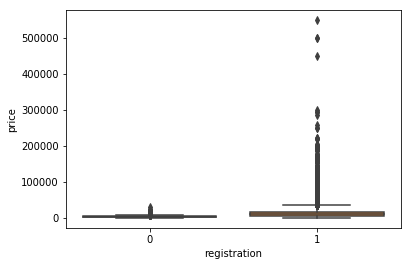

In [179]:
# Registration appears (atleast visually) to be correlated with price
# We will keep this feature in our model
sns.boxplot(x='registration',y='price',data=df);

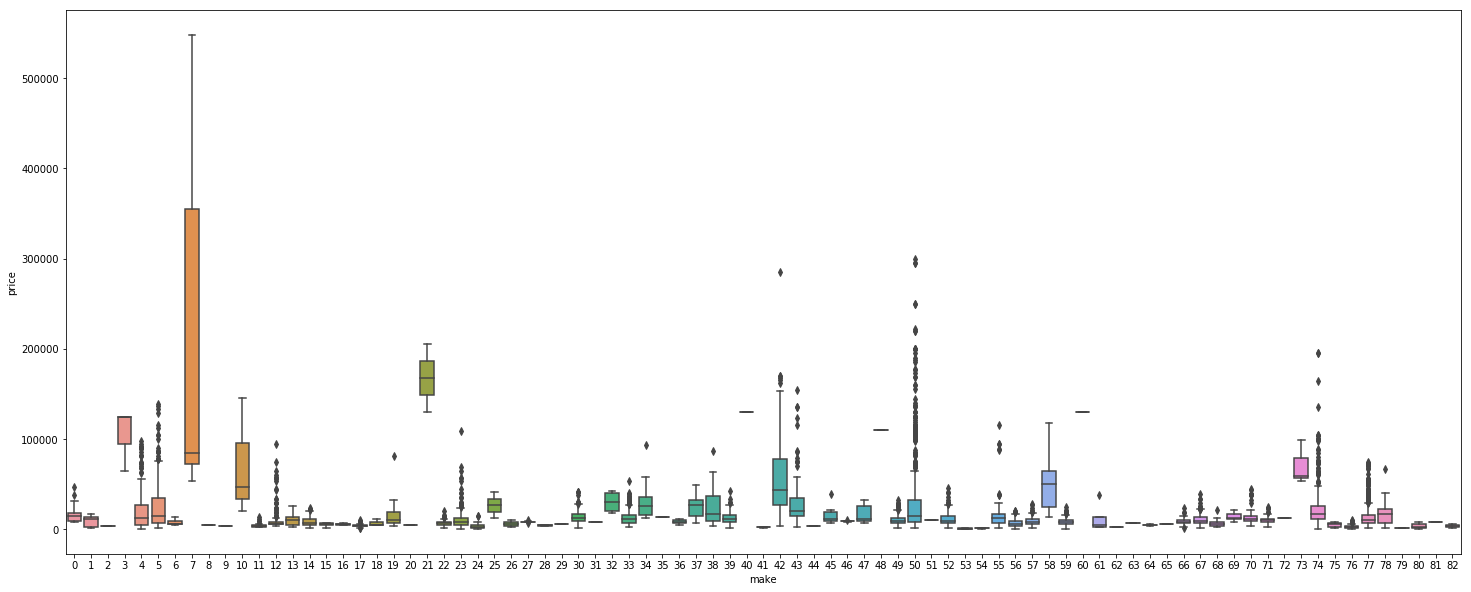

In [180]:
# Make appears to be highly correlated with price
# We will keep this feature in our model
plt.figure(figsize=(25,10)) 
sns.boxplot(x='make',y='price',data=df);

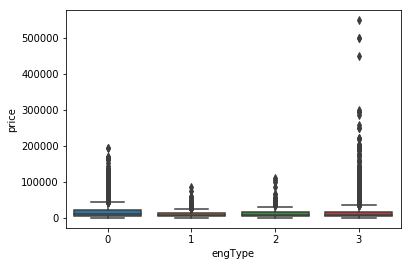

In [181]:
# Appears to be correlated with price
sns.boxplot(x='engType',y='price',data=df);

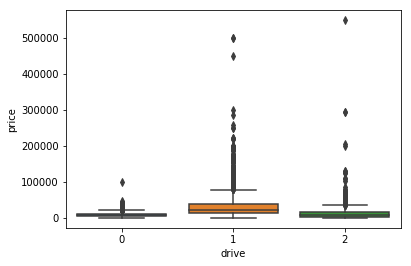

In [182]:
# Appears to be correlated with price
sns.boxplot(x='drive',y='price',data=df);

# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
# I will include all features variables in my model
# Set target variable as vehicle price
y = df['price']
# Set features variable
X = df.drop(['price', 'age'], axis=1)


## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
# Verify correct shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6796, 8)
(1699, 8)
(6796,)
(1699,)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [186]:
# fit X and Y training data into our linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [187]:
print("Our model's coefficients are: ",model.coef_)
print("Our model's intercept is: ",model.intercept_)

Our model's coefficients are:  [  -35.16726588 -1770.98509064   -40.26859658   273.03540784
 -1111.08031708  4535.06013378  1140.73124767  8292.04613874]
Our model's intercept is:  -2269355.0772314165


## 1.5 Use the test data to make predictions.

In [0]:
# Create prediction using the X variables test data 
y_pred = model.predict(X_test)

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [189]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', rmse)
print('R^2 Score:', r2)

Root Mean Squared Error: 21394.43524600266
R^2 Score: 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

The coefficient for the year feature in our model is 1140.73. We can interpret this as meaning that for every increase in year, the raw dollar value of the car increases by our coefficient variable of 1140.73.

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

Our root mean squared error can be interpreted as the average difference in our target variable (price) from our actual test data (y_test) and our predicted data (y_pred).

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

The R-squared value can be interpreted as the percentage of variability in our target variable(price) that is explained by the change in our independent variables (features).

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
# Engineer new feature by taking the log of the price column
df['price_ln'] = np.log(df['price'])

In [0]:
# Assign log of price columnn as our new y variable
target = 'price_ln'
y = df[target]

In [192]:
# Ensure feature is in our dataset
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,age,price_ln
0,23,15500.0,0,68,2.5,1,1,2010,1,6,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,5,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,8,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,4,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,3,9.717158


## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

In [0]:
features = ['mileage', 'year', 'make', 'body', 'engV', 'engType', 'registration']
X = df[features]

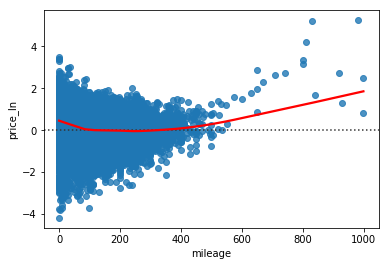

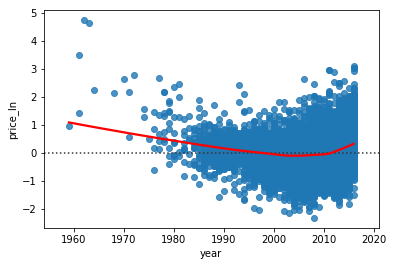

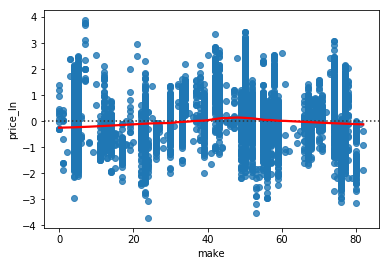

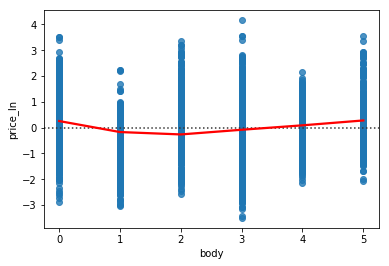

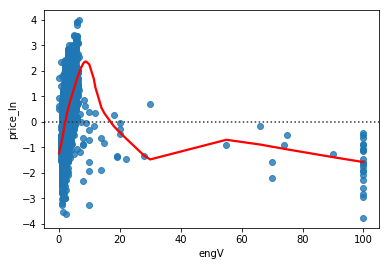

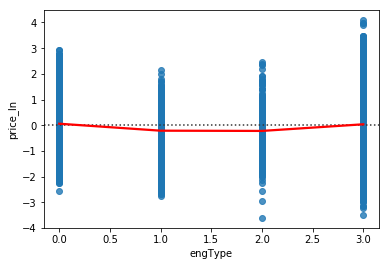

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


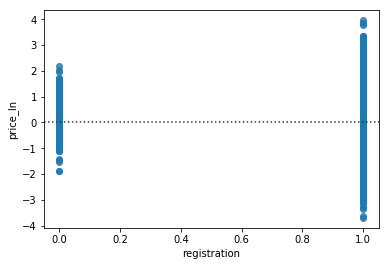

In [203]:
for feature in features:
    sns.residplot(X[feature], y, lowess=True, line_kws=dict(color='r'))
    plt.show()

The **age** and **mileage** features look appropriate for creating polynomial features.

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
# Create new features as the square of the original 
df['mileage_squared'] = df['mileage'] **2
df['year_squared'] = df['year'] **2 

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [205]:
# Include new polynomial features into features list
features = ['body', 'mileage_squared', 'engV', 'engType', 'year_squared', 'drive']
X = df[features]

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable using our feature test data
y_pred = model.predict(X_test)

# Calculate root mean squared error and r-squared values
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error: ', rmse)
print('R^2 Score: ', r2)
print('Model Coefficients: ', model.coef_)
print('Model Intercept: ', model.intercept_)

Root Mean Squared Error:  0.6062296614497857
R^2 Score:  0.6165190217102838
Model Coefficients:  [-9.66189954e-02  2.07553962e-07  8.51222195e-03 -3.62288818e-02
  2.52710947e-05  3.95578039e-01]
Model Intercept:  -92.53614221027169


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Our coefficients in a Log-Linear Regression are different from Ordinary Least Squares Regression because the coefficients are now denoting the **percentage change** with every increase/decrease in the corresponding value instead of the raw dollar value change.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [0]:
# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Always 42

In [207]:
# Training model using Decision Tree Regressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [208]:
# R squared score for test data
print('R^2', tree.score(X_test, y_test))

R^2 0.773733886045652


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [209]:
# Create OLS model with robust standard errors.
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               price_ln   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.146e+05
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:35:32   Log-Likelihood:                -10300.
No. Observations:                8495   AIC:                         2.061e+04
Df Residuals:                    8489   BIC:                         2.065e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
body               -0.1564      0.007    -

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [210]:
# Calculate Variance Inflation Factor scores
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const              26654.187594
body                   1.128366
mileage_squared        1.247330
engV                   1.008716
engType                1.082281
year_squared           1.250612
drive                  1.085937
dtype: float64

All of our variables have a variance inflation factor that is near 1, which indicates **a low r squared score for each variable in the VIF calculation**. Typically, a VIF score greater than 5 is in indicator of multicollinearity problems and a VIF score greater than 10 indicates high levels of multicollinearity.  Our variables do not appear to have any multicollinearity problems.